# Logistic Regression with a Neural Network mindset

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- tensorflow is the fundamental package for machine learning in python

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
import tensorflow as tf

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [92]:
# Loading the data (cat/non-cat)
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels
 
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels
 
classes = np.array(test_dataset["list_classes"][:]) # the list of classes
 
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = [1], it's a 'cat' picture.


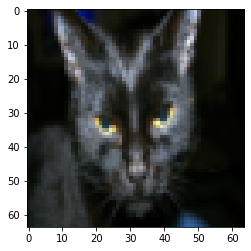

In [93]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [94]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
#train_set_x_orig[0]

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [95]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [96]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - Setting up hyperparameters and data set parameters ##

In this step, we initialize the model parameters. num_classes denotes the number of outputs, which is 1, as we have cat or non-cat in the data set. num_features defines the number of input parameters, and we store 12288 since each image contains 12288 pixels.

learning_rate defines the step size the model should take to converge to a minimum loss. training_steps defines the number of steps the model will take to train itself completely, and batch_size denotes the number of samples per each batch in the training process. We use display_step to iterate over the training steps and print them in the training process.

In [97]:
num_classes = 1 # cat or non-cat
num_features = num_px * num_px * 3 # 64*64*3 = 12288

# Training parameters.
learning_rate = 0.01
epochs = 2000
batch_size = train_set_x_flatten.shape[1] # full batch
display_step = 100

## 4 - Model creation, compilation, fitting and evaluation ##

In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_features, input_dim=num_features, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [99]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

[]

In [100]:
history = model.fit(train_set_x.T, train_set_y.T, epochs=epochs, batch_size=batch_size)

1s 1s/step - loss: 0.0192 - accuracy: 1.0000
Epoch 1802/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0191 - accuracy: 1.0000
Epoch 1803/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0191 - accuracy: 1.0000
Epoch 1804/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0191 - accuracy: 1.0000
Epoch 1805/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0191 - accuracy: 1.0000
Epoch 1806/2000
1/1 [==============================] - 1s 993ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 1807/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0190 - accuracy: 1.0000
Epoch 1808/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0190 - accuracy: 1.0000
Epoch 1809/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0190 - accuracy: 1.0000
Epoch 1810/2000
1/1 [==============================] - 1s 1s/step - loss: 0.0190 - accuracy: 1.0000
Epoch 1811/2000
1/1 [==============================]

In [110]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [123]:
print('Epoch 2000: loss = ', history.history['loss'][1999], ', accuracy = ', history.history['accuracy'][1999])

Epoch 2000: loss =  0.01582738757133484 , accuracy =  1.0


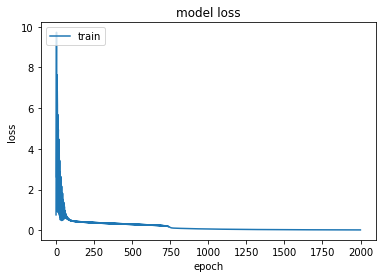

In [120]:
# summarize history for loss
plt.plot()
plt.plot(range(0, epochs), history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

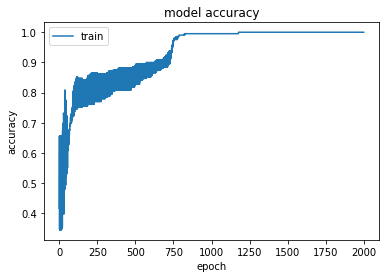

In [121]:
# summarize history for accuracy
plt.plot(range(0, epochs), history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [124]:
test_loss, test_acc = model.evaluate(test_set_x.T, test_set_y.T)

2/2 [==============================] - 0s 37ms/step - loss: 1.4033 - accuracy: 0.7000


y = [1], it's a 'cat' picture.


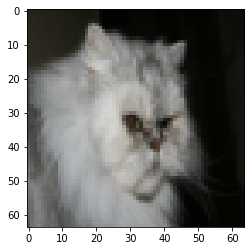

In [126]:
# Example of a picture
index = 10
plt.imshow(test_set_x_orig[index])
print ("y = " + str(test_set_y[:, index]) + ", it's a '" + classes[np.squeeze(test_set_y[:, index])].decode("utf-8") +  "' picture.")